# Capstone Project - YourCabs

# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings;
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("YourCabs.csv")

In [4]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


# Exploratory data analysis 

In [5]:
data.shape

(43431, 18)

In [6]:
data.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [8]:
data.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [9]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
Car_Cancellation           0
dtype: int64

# Data visualization

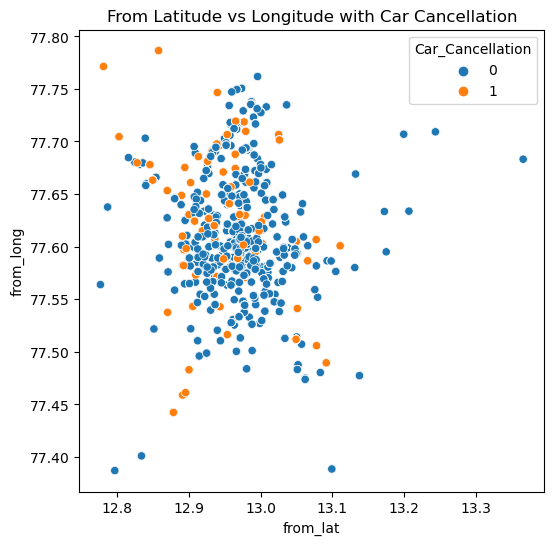

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='from_lat', y='from_long', hue='Car_Cancellation')
plt.title('From Latitude vs Longitude with Car Cancellation')
plt.show()

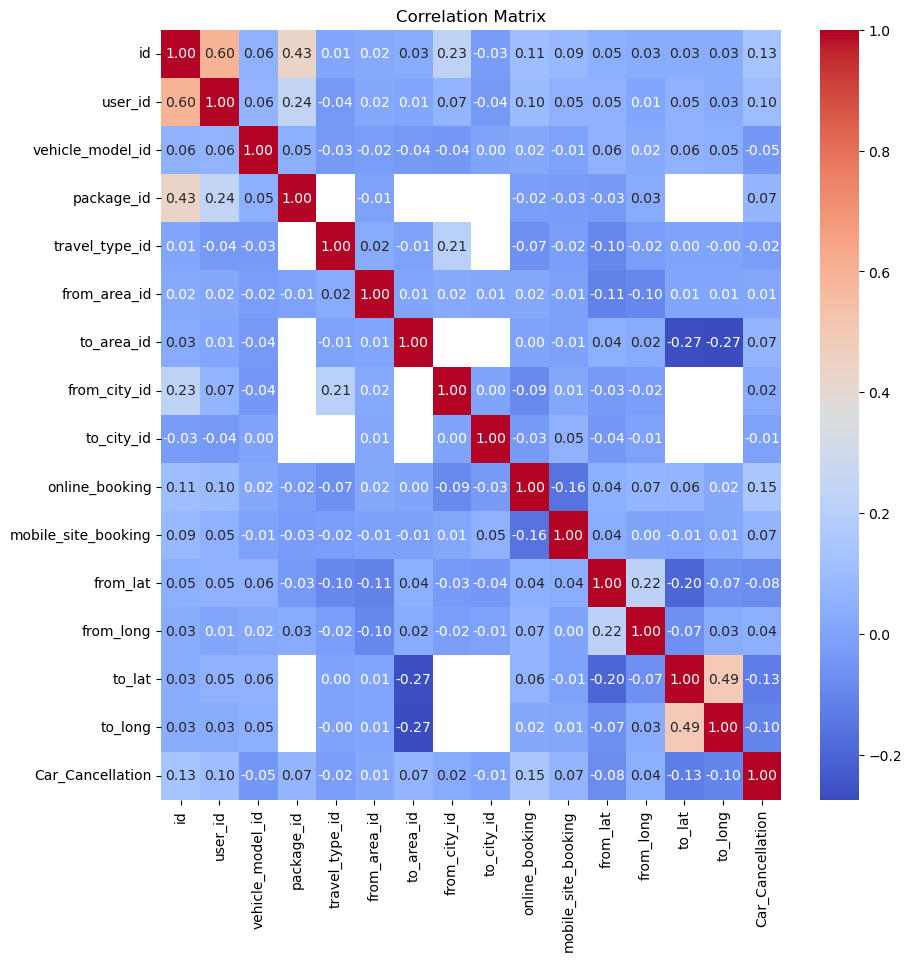

In [11]:
# Finding the correlation between the variables using heatmap
# The empty place interpret the null values

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Convert datetime columns to datetime objects
data['from_date'] = pd.to_datetime(data['from_date'])
data['booking_created'] = pd.to_datetime(data['booking_created'])

# Extract useful features from datetime columns
data['from_date_hour'] = data['from_date'].dt.hour
data['booking_created_hour'] = data['booking_created'].dt.hour

# Drop the original datetime columns
data.drop(['from_date', 'booking_created'], axis=1, inplace=True)

# Split the dataset into features and target variable

In [13]:
X = data.drop(columns=['Car_Cancellation'])
y = data['Car_Cancellation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Model building

In [15]:
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Training the models

In [16]:
logreg.fit(X_train_scaled, y_train)
dtree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

SVC()

# Predictions

In [17]:
y_pred = logreg.predict(X_test_scaled)
y_pred = dtree.predict(X_test_scaled)
y_pred = rf.predict(X_test_scaled)
y_pred = svm.predict(X_test_scaled)

# Evaluating models

In [18]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Support Vector Machine Accuracy:", accuracy_score(y_test,y_pred))

Logistic Regression Accuracy: 0.9269022677564176
Decision Tree Accuracy: 0.9269022677564176
Random Forest Accuracy: 0.9269022677564176
Support Vector Machine Accuracy: 0.9269022677564176


# Classification reports

In [19]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8052
           1       0.00      0.00      0.00       635

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8052
           1       0.00      0.00      0.00       635

    accuracy                           0.93      8687
   macro avg       0.46      0.50      0.48      8687
weighted avg       0.86      0.93      0.89      8687


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      8052
           1       0.00      0.00      0.00       635

    accuracy                           0.93      8687
   macro